# Import Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from warnings import filterwarnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Import Data

In [2]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X = spambase.data.features 
y = spambase.data.targets 
data = pd.concat([X, y], axis=1)
data

# Visualize data

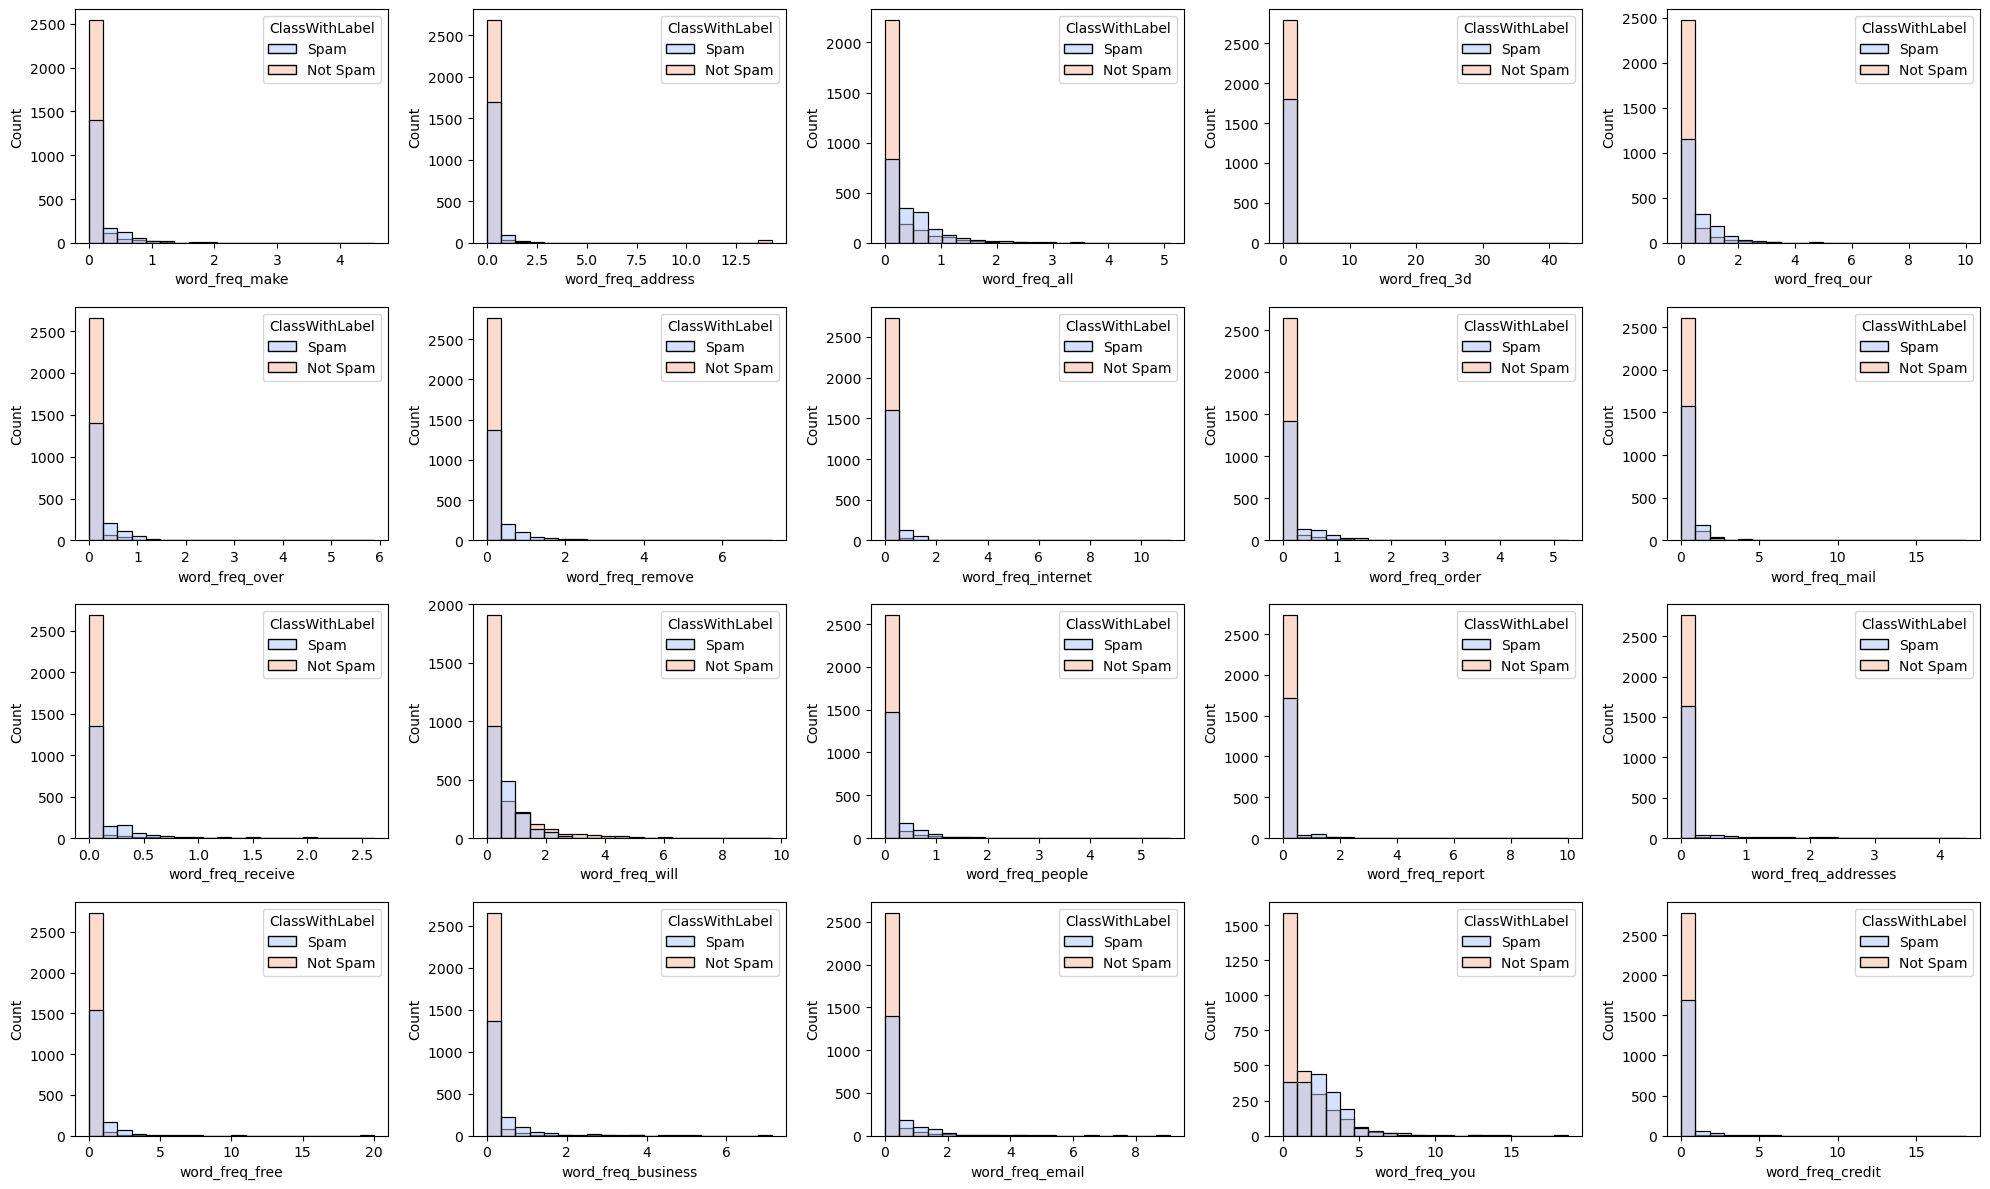

In [4]:
# annoying future warning to ignore
filterwarnings('ignore')
data['ClassWithLabel'] = data['Class'].map({0: 'Not Spam', 1: 'Spam'})

num_features = X.shape[1]
num_cols = 5
num_rows = 4
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_features:
        sns.histplot(data=data, x=X.columns[i], hue='ClassWithLabel', bins=20, kde=False, ax=ax, palette='coolwarm')
    else:
        ax.set_visible(False)
plt.tight_layout()

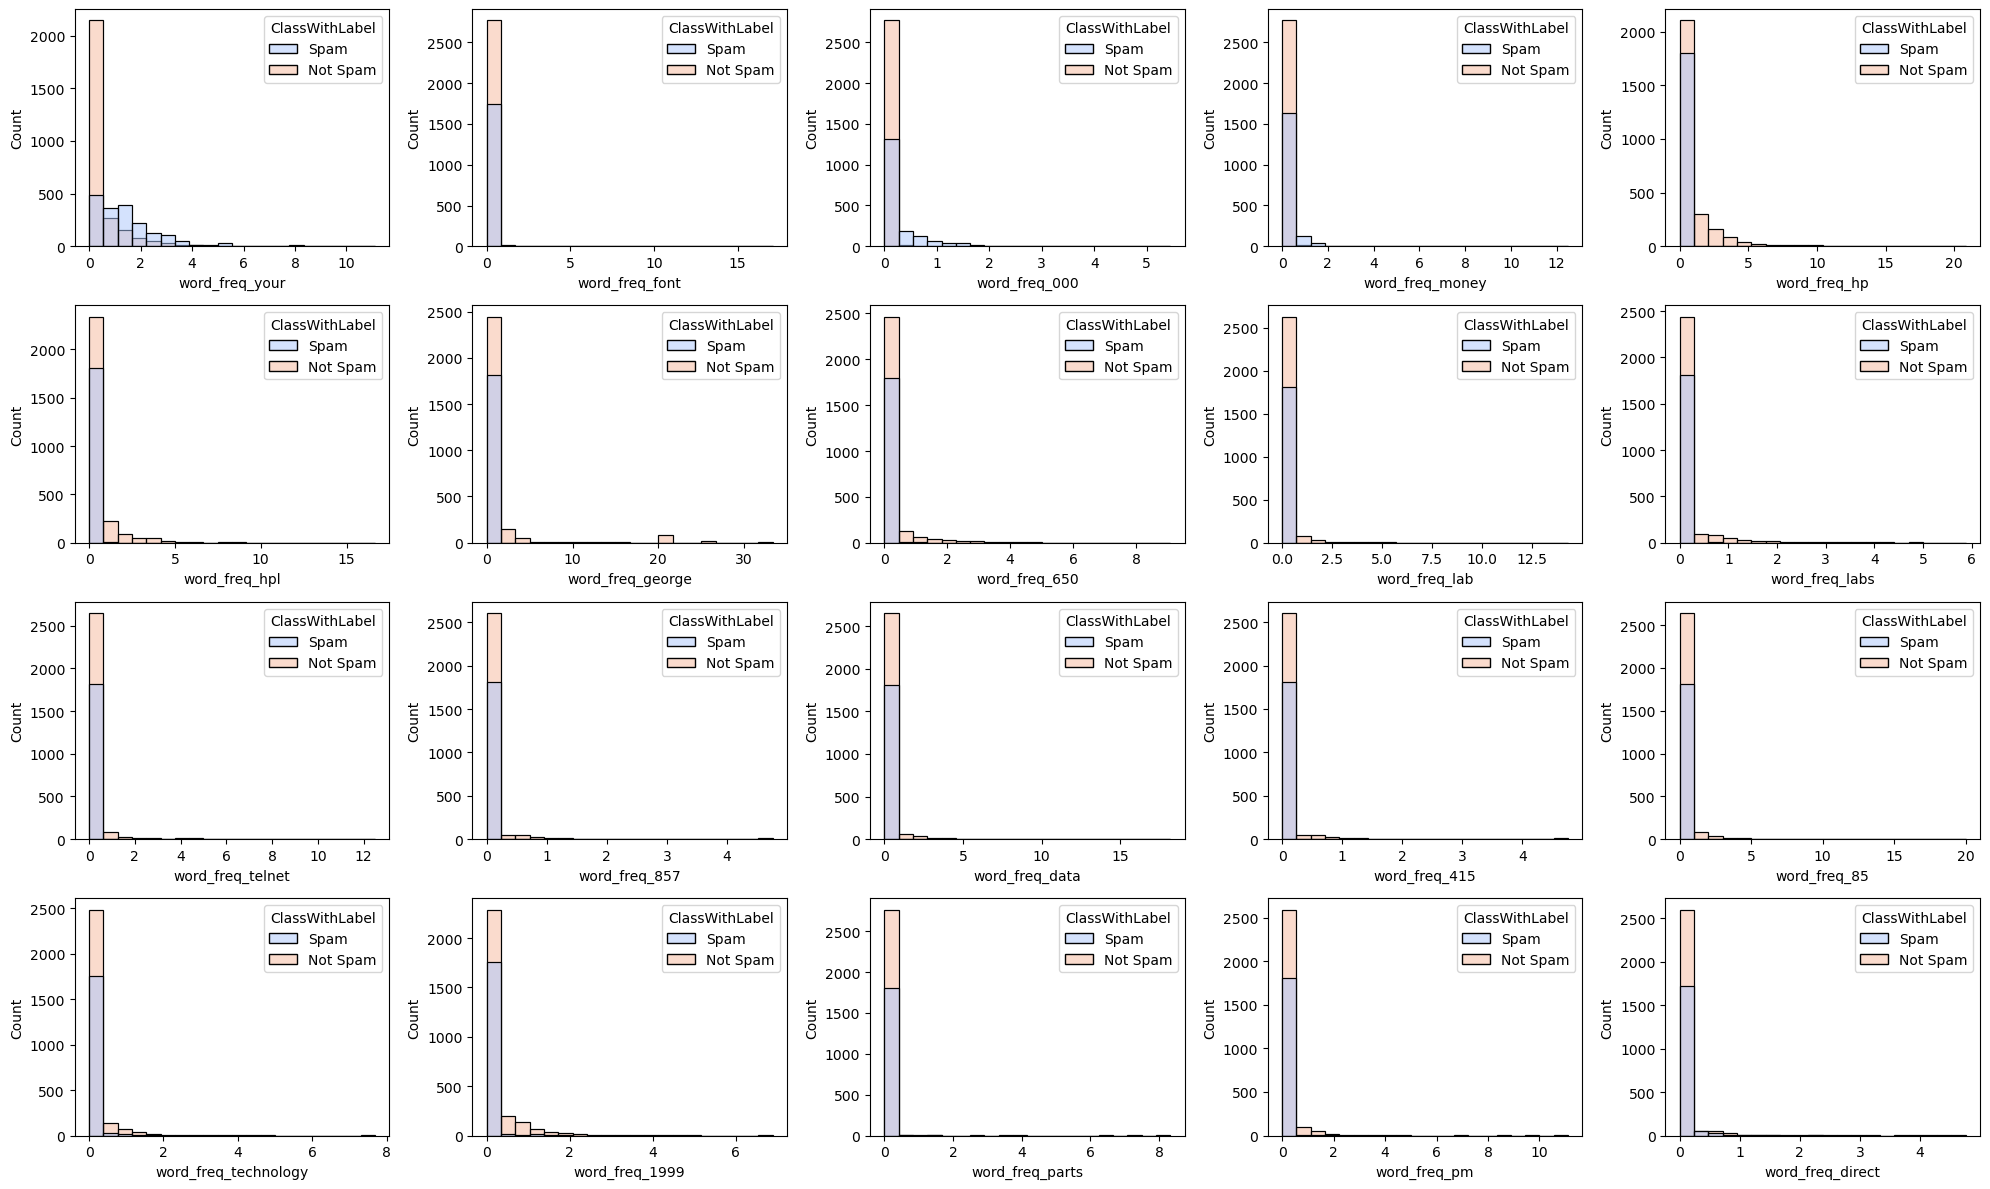

In [5]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 12))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_features:
        sns.histplot(data=data, x=X.columns[i + 20], hue='ClassWithLabel', bins=20, kde=False, ax=ax, palette='coolwarm')
    else:
        ax.set_visible(False)
plt.tight_layout()

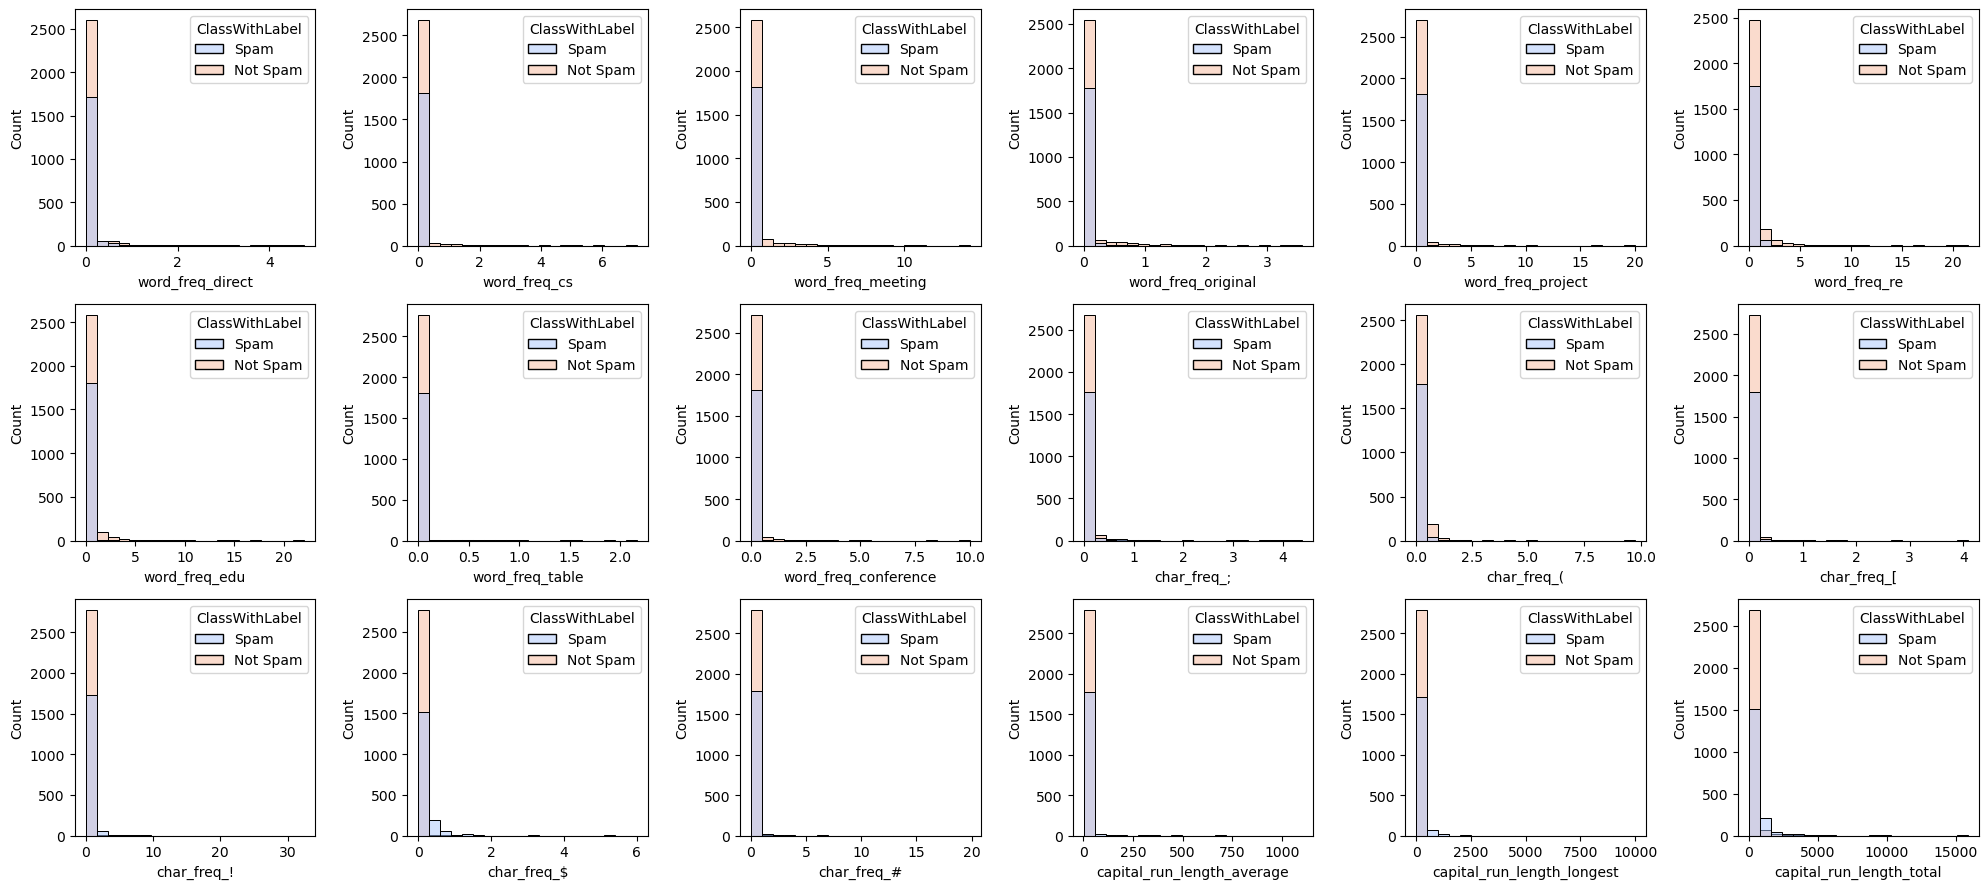

In [6]:
fig, axes = plt.subplots(3, 6, figsize=(20, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < num_features:
        sns.histplot(data=data, x=X.columns[i + 39], hue='ClassWithLabel', bins=20, kde=False, ax=ax, palette='coolwarm')
    else:
        ax.set_visible(False)
plt.tight_layout()

In [7]:
data = data.drop(columns={'ClassWithLabel'})

# Pre-processing

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

# Logistic Regression

## Train Model

In [10]:
y = y.to_numpy().ravel()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
log_reg = LogisticRegression(max_iter=2000, solver='sag')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000, solver='sag')

## Test Model

In [12]:
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [13]:
print(f'Accuracy Score: {accuracy*100:.2f}%')
print(f'Precision Score: {precision*100:.2f}%')
print(f'Recall Score: {recall*100:.2f}%')

Accuracy Score: 92.29%
Precision Score: 93.07%
Recall Score: 87.96%


## Train and Test on multiple splits

In [14]:
accuracy_scores = np.array([])
precision_scores = np.array([])
recall_scores = np.array([])
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    log_reg = LogisticRegression(max_iter=5000, solver='sag')
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    accuracy_scores = np.append(accuracy_scores, accuracy_score(y_test, y_pred))
    precision_scores = np.append(precision_scores, precision_score(y_test, y_pred))
    recall_scores = np.append(recall_scores, recall_score(y_test, y_pred))

In [15]:
print(f'Mean Accuracy Score: {np.mean(accuracy_scores)*100:.2f}%')
print(f'Mean Precision Score: {np.mean(precision_scores)*100:.2f}%')
print(f'Mean Recall Score: {np.mean(recall_scores)*100:.2f}%')

Mean Accuracy Score: 92.39%
Mean Precision Score: 92.20%
Mean Recall Score: 88.31%
